In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
df = sns.load_dataset('mpg')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [3]:
# name des herstellers extrahieren --> erstes Wort aus "name" in neue Spalte "manufacturer"
df.name.str.split(" ").str.get(0)
df.name.str.split(expand=True)[0]

def get_car_company(value):
    return value.split()[0]

def get_car_name(value):
    return ' '.join(value.split()[1:])

df['company'] = df.name.apply(get_car_company)
df['car_name'] = df.name.apply(get_car_name)

company_correction = { 'chevroelt' : 'chevrolet', 'maxda' : 'mazda', 'chevy' : 'chevrolet',
                     'vw': 'volkswagen', 'vokswagen':'volkswagen', 'volkswage':'volkswagen',
                      'mercedes-benz':'mercedes',
                     'toyouta':'toyota'}

# Verwendung einer Standardmethode
df['company'] = df.company.replace(company_correction)

In [5]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,company,car_name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,chevrolet,chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,buick,skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,plymouth,satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,amc,rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,ford,torino


In [11]:
px.scatter(df, x='mpg', y='weight', color='origin', marginal_x='histogram', marginal_y='rug')

In [14]:
px.scatter(df, x='mpg', y='weight', facet_col='origin', marginal_x='histogram', color='company')

# Contour Plot

In [17]:
px.density_contour(df, x='mpg', y='weight', color='origin', marginal_x='histogram', marginal_y='histogram')

In [20]:
# show number of cars
fig = px.density_contour(df, 
                         x='horsepower', 
                         y='weight', 
                         facet_col='origin', 
                         title='Number of cars per origin / weight / horsepower')
fig.update_traces(contours_coloring="fill", contours_showlabels = True)
fig.show()

In [22]:
# show mean mpg of cars
fig = px.density_contour(df, x='horsepower', y='weight', z='mpg', 
                         histfunc='avg',
                         facet_col='origin', title='Average MPG of cars per origin / weight / horsepower')
fig.update_traces(contours_coloring="fill", contours_showlabels = True)
fig.show()

<AxesSubplot:>

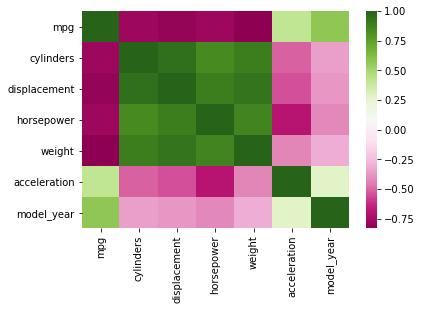

In [26]:
sns.heatmap(df.corr(), cmap='PiYG')

In [29]:
px.parallel_coordinates(df, dimensions=['mpg', 'cylinders', 'weight'])